## João Pedro Santos Pereira ADS-B 3º Semestre

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns= 100
pd.options.display.max_rows=5

In [2]:
file_candidates_BA = pd.read_csv("consulta_cand_2020_BA.csv", sep=";", low_memory=False, error_bad_lines=False, encoding='latin-1')
file_candidates_GO = pd.read_csv("consulta_cand_2020_GO.csv", sep=";", low_memory=False, error_bad_lines=False, encoding='latin-1')
file_candidates_SP = pd.read_csv("consulta_cand_2020_SP.csv", sep=";", low_memory=False, error_bad_lines=False, encoding='latin-1')

## -----------------------------------------------------------------------------------------------------------------------------
                                  Candidates elected and their property in goods
## -----------------------------------------------------------------------------------------------------------------------------

In [3]:
file_candidates_SP.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [4]:
df_candidates_BA = file_candidates_BA[['SQ_CANDIDATO','CD_SIT_TOT_TURNO', 'ST_DECLARAR_BENS']]
df_candidates_GO = file_candidates_GO[['SQ_CANDIDATO','CD_SIT_TOT_TURNO', 'ST_DECLARAR_BENS']]
df_candidates_SP = file_candidates_SP[['SQ_CANDIDATO','CD_SIT_TOT_TURNO', 'ST_DECLARAR_BENS']]

In [5]:
df_candidates_BA

,SQ_CANDIDATO,CD_SIT_TOT_TURNO,ST_DECLARAR_BENS
0,50000830236,2,S
1,50001044928,2,S
...,...,...,...
41605,50000703152,2,S
41606,50001123385,2,S


In [6]:
df_candidates_GO

,SQ_CANDIDATO,CD_SIT_TOT_TURNO,ST_DECLARAR_BENS
0,90001144849,-1,N
1,90000719924,-1,S
...,...,...,...
24935,90001027843,2,S
24936,90001026812,5,N


In [7]:
df_candidates_SP

,SQ_CANDIDATO,CD_SIT_TOT_TURNO,ST_DECLARAR_BENS
0,250000898255,-1,S
1,250000764425,-1,S
...,...,...,...
93765,250001117295,4,S
93766,250000824829,5,S


In [8]:
df_candidates_BA = df_candidates_BA.query("1 <= CD_SIT_TOT_TURNO < 4")
df_candidates_GO = df_candidates_GO.query("1 <= CD_SIT_TOT_TURNO < 4")
df_candidates_SP = df_candidates_SP.query("1 <= CD_SIT_TOT_TURNO < 4")

In [9]:
df_candidates_BA = df_candidates_BA.query("ST_DECLARAR_BENS == 'S'")
df_candidates_GO = df_candidates_GO.query("ST_DECLARAR_BENS == 'S'")
df_candidates_SP = df_candidates_SP.query("ST_DECLARAR_BENS == 'S'")

In [10]:
df_candidates_BA

,SQ_CANDIDATO,CD_SIT_TOT_TURNO,ST_DECLARAR_BENS
0,50000830236,2,S
1,50001044928,2,S
...,...,...,...
41605,50000703152,2,S
41606,50001123385,2,S


In [11]:
df_candidates_GO

,SQ_CANDIDATO,CD_SIT_TOT_TURNO,ST_DECLARAR_BENS
8,90000679847,2,S
15,90000783717,2,S
...,...,...,...
24926,90000677016,3,S
24935,90001027843,2,S


In [12]:
df_candidates_SP

,SQ_CANDIDATO,CD_SIT_TOT_TURNO,ST_DECLARAR_BENS
5,250000795233,3,S
10,250000797201,2,S
...,...,...,...
93763,250001254053,2,S
93764,250000941620,2,S


In [13]:
df_goods_BA = pd.read_csv("bem_candidato_2020_BA.csv", sep=";", low_memory=False, error_bad_lines=False, encoding='latin-1')
df_goods_GO = pd.read_csv("bem_candidato_2020_GO.csv", sep=";", low_memory=False, error_bad_lines=False, encoding='latin-1')
df_goods_SP = pd.read_csv("bem_candidato_2020_SP.csv", sep=";", low_memory=False, error_bad_lines=False, encoding='latin-1')

In [14]:
df_goods_BA.columns


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'SG_UF',
       'SG_UE', 'NM_UE', 'SQ_CANDIDATO', 'NR_ORDEM_CANDIDATO',
       'CD_TIPO_BEM_CANDIDATO', 'DS_TIPO_BEM_CANDIDATO', 'DS_BEM_CANDIDATO',
       'VR_BEM_CANDIDATO', 'DT_ULTIMA_ATUALIZACAO', 'HH_ULTIMA_ATUALIZACAO'],
      dtype='object')

In [15]:
df_goods_BA = df_goods_BA[['SQ_CANDIDATO', 'VR_BEM_CANDIDATO']]

In [16]:
df_goods_GO = df_goods_GO[['SQ_CANDIDATO', 'VR_BEM_CANDIDATO']]

In [17]:
df_goods_SP = df_goods_SP[['SQ_CANDIDATO', 'VR_BEM_CANDIDATO']]

In [18]:
df_goods_BA["VR_BEM_CANDIDATO"] = df_goods_BA["VR_BEM_CANDIDATO"].str.replace(r'\D', '.').astype('float')
df_goods_GO["VR_BEM_CANDIDATO"] = df_goods_GO["VR_BEM_CANDIDATO"].str.replace(r'\D', '.').astype('float')
df_goods_SP["VR_BEM_CANDIDATO"] = df_goods_SP["VR_BEM_CANDIDATO"].str.replace(r'\D', '.').astype('float')

In [19]:
df_goods_BA = df_goods_BA.groupby("SQ_CANDIDATO").sum()
df_goods_GO = df_goods_GO.groupby("SQ_CANDIDATO").sum()
df_goods_SP = df_goods_SP.groupby("SQ_CANDIDATO").sum()

In [20]:
df_goods_BA

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
50000631822,23000.0
50000631824,5000.0
...,...
50001278264,6000.0
50001280673,80000.0


In [21]:
df_goods_GO

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
90000631793,17000.00
90000631820,114720.01
...,...
90001278823,922271.88
90001281616,321000.00


In [22]:
df_goods_SP

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
250000631783,40000.00
250000631784,1129758.00
...,...
250001282301,37000.00
250001282532,651505.65


In [23]:
df_goods_electeds_BA = df_goods_BA[df_goods_BA.index.isin(df_candidates_BA.SQ_CANDIDATO)]
df_goods_electeds_GO = df_goods_GO[df_goods_GO.index.isin(df_candidates_GO.SQ_CANDIDATO)]
df_goods_electeds_SP = df_goods_SP[df_goods_SP.index.isin(df_candidates_SP.SQ_CANDIDATO)]

In [24]:
df_goods_electeds_BA

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
50000631937,409000.0
50000631938,310000.0
...,...
50001274553,59433.4
50001278264,6000.0


In [25]:
df_goods_electeds_GO

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
90000631793,17000.0
90000635328,250000.0
...,...
90001275364,444500.0
90001281616,321000.0


In [26]:
df_goods_electeds_SP

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
250000632000,997500.00
250000632001,2707538.02
...,...
250001275760,5686039.07
250001278268,3000.00


In [27]:
BA_4x0 = df_goods_electeds_BA[df_goods_electeds_BA.VR_BEM_CANDIDATO <= 10000.0].values.tolist()
BA_5x0 = df_goods_electeds_BA.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").values.tolist()
BA_6x0 = df_goods_electeds_BA.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").values.tolist()
BA_7x0 = df_goods_electeds_BA.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").values.tolist()
BA_8x0 = df_goods_electeds_BA.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").values.tolist()

GO_4x0 = df_goods_electeds_GO[df_goods_electeds_GO.VR_BEM_CANDIDATO <= 10000.0].values.tolist()
GO_5x0 = df_goods_electeds_GO.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").values.tolist()
GO_6x0 = df_goods_electeds_GO.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").values.tolist()
GO_7x0 = df_goods_electeds_GO.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").values.tolist()
GO_8x0 = df_goods_electeds_GO.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").values.tolist()

SP_4x0 = df_goods_electeds_SP[df_goods_electeds_SP.VR_BEM_CANDIDATO <= 10000.0].values.tolist()
SP_5x0 = df_goods_electeds_SP.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").values.tolist()
SP_6x0 = df_goods_electeds_SP.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").values.tolist()
SP_7x0 = df_goods_electeds_SP.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").values.tolist()
SP_8x0 = df_goods_electeds_SP.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").values.tolist()

graph_BA = [len(BA_4x0), len(BA_5x0), len(BA_6x0), len(BA_7x0), len(BA_8x0)]
graph_GO = [len(GO_4x0), len(GO_5x0), len(GO_6x0), len(GO_7x0), len(GO_8x0)]
graph_SP = [len(SP_4x0), len(SP_5x0), len(SP_6x0), len(SP_7x0), len(SP_8x0)]

df_graph = pd.DataFrame({'BA': graph_BA, 'GO': graph_GO, 'SP': graph_SP}, 
                      index=['10000','100000','1000000', '10000000', '100000000'])
df_graph

,BA,GO,SP
10000,317,174,452
100000,1641,699,2153
1000000,2182,1307,3450
10000000,200,203,405
100000000,6,12,14


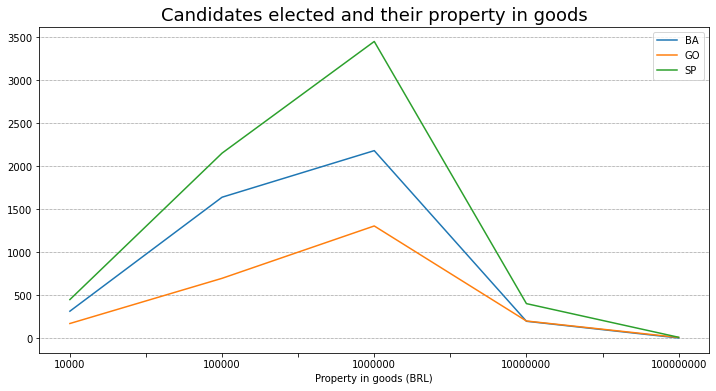

In [28]:
ax = df_graph.plot.line(rot=0, figsize=(12,6))
ax.set_xlabel('Property in goods (BRL)')
ax.set_title('''Candidates elected and their property in goods''', fontsize=18)
ax.grid(linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid()

In [29]:
df_goods_nonelecteds_BA = df_goods_BA[~df_goods_BA.index.isin(df_candidates_BA.SQ_CANDIDATO)]
df_goods_nonelecteds_GO = df_goods_GO[~df_goods_GO.index.isin(df_candidates_GO.SQ_CANDIDATO)]
df_goods_nonelecteds_SP = df_goods_SP[~df_goods_SP.index.isin(df_candidates_SP.SQ_CANDIDATO)]

In [30]:
df_goods_nonelecteds_BA

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
50000631822,23000.0
50000631824,5000.0
...,...
50001277818,1320000.0
50001280673,80000.0


In [31]:
df_goods_nonelecteds_GO

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
90000631820,114720.01
90000631821,87500.00
...,...
90001275320,150000.00
90001278823,922271.88


In [32]:
df_goods_nonelecteds_SP

,VR_BEM_CANDIDATO
SQ_CANDIDATO,
250000631783,40000.00
250000631784,1129758.00
...,...
250001282301,37000.00
250001282532,651505.65


In [33]:
BA_4x0 = df_goods_nonelecteds_BA[df_goods_nonelecteds_BA.VR_BEM_CANDIDATO <= 10000.0].values.tolist()
BA_5x0 = df_goods_nonelecteds_BA.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").values.tolist()
BA_6x0 = df_goods_nonelecteds_BA.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").values.tolist()
BA_7x0 = df_goods_nonelecteds_BA.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").values.tolist()
BA_8x0 = df_goods_nonelecteds_BA.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").values.tolist()

GO_4x0 = df_goods_nonelecteds_GO[df_goods_nonelecteds_GO.VR_BEM_CANDIDATO <= 10000.0].values.tolist()
GO_5x0 = df_goods_nonelecteds_GO.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").values.tolist()
GO_6x0 = df_goods_nonelecteds_GO.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").values.tolist()
GO_7x0 = df_goods_nonelecteds_GO.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").values.tolist()
GO_8x0 = df_goods_nonelecteds_GO.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").values.tolist()

SP_4x0 = df_goods_nonelecteds_SP[df_goods_nonelecteds_SP.VR_BEM_CANDIDATO <= 10000.0].values.tolist()
SP_5x0 = df_goods_nonelecteds_SP.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").values.tolist()
SP_6x0 = df_goods_nonelecteds_SP.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").values.tolist()
SP_7x0 = df_goods_nonelecteds_SP.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").values.tolist()
SP_8x0 = df_goods_nonelecteds_SP.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").values.tolist()

graph_BA = [len(BA_4x0), len(BA_5x0), len(BA_6x0), len(BA_7x0), len(BA_8x0)]
graph_GO = [len(GO_4x0), len(GO_5x0), len(GO_6x0), len(GO_7x0), len(GO_8x0)]
graph_SP = [len(SP_4x0), len(SP_5x0), len(SP_6x0), len(SP_7x0), len(SP_8x0)]

df_graph = pd.DataFrame({'BA': graph_BA, 'GO': graph_GO, 'SP': graph_SP}, 
                      index=['10000','100000','1000000', '10000000', '100000000'])
df_graph

,BA,GO,SP
10000,3479,2340,7106
100000,9305,5314,18813
1000000,6970,6400,23427
10000000,474,620,1904
100000000,13,35,50


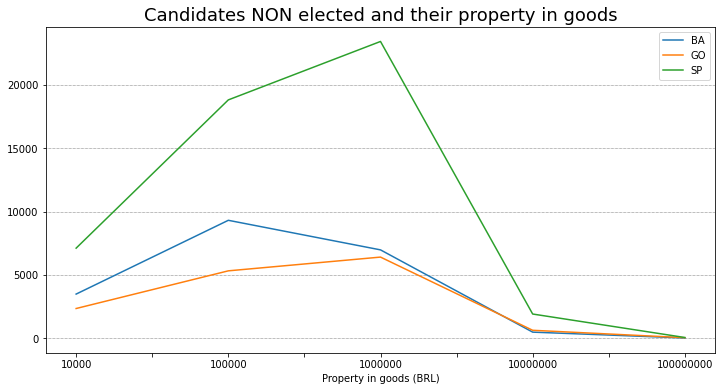

In [34]:
ax = df_graph.plot.line(rot=0, figsize=(12,6))
ax.set_xlabel('Property in goods (BRL)')
ax.set_title('''Candidates NON elected and their property in goods''', fontsize=18)
ax.grid(linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid()

## ----------------------------------------------------------------------------------------------------------------------------
                                    Instruction grade by property in goods
## ----------------------------------------------------------------------------------------------------------------------------

In [35]:
file_candidates_SP.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO',
       'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NM_URNA_CANDIDATO',
       'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'CD_DETALHE_SITUACAO_CAND', 'DS_DETALHE_SITUACAO_CAND', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 'SQ_COLIGACAO',
       'NM_COLIGACAO', 'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE',
       'DS_NACIONALIDADE', 'SG_UF_NASCIMENTO', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'DT_NASCIMENTO', 'NR_IDADE_DATA_POSSE',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       '

In [36]:
df_instruction_BA = file_candidates_BA[['SQ_CANDIDATO', 'CD_GRAU_INSTRUCAO']]
df_instruction_BA

df_instruction_GO = file_candidates_GO[['SQ_CANDIDATO', 'CD_GRAU_INSTRUCAO']]
df_instruction_GO

df_instruction_SP = file_candidates_SP[['SQ_CANDIDATO', 'CD_GRAU_INSTRUCAO']]
df_instruction_SP


,SQ_CANDIDATO,CD_GRAU_INSTRUCAO
0,250000898255,8
1,250000764425,6
...,...,...
93765,250001117295,3
93766,250000824829,8


In [37]:
BA_4x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_electeds_BA.query("VR_BEM_CANDIDATO <= 10000").index)]
BA_5x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_electeds_BA.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").index)]
BA_6x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_electeds_BA.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").index)]
BA_7x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_electeds_BA.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").index)]
BA_8x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_electeds_BA.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").index)]

GO_4x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_electeds_GO.query("VR_BEM_CANDIDATO <= 10000").index)]
GO_5x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_electeds_GO.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").index)]
GO_6x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_electeds_GO.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").index)]
GO_7x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_electeds_GO.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").index)]
GO_8x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_electeds_GO.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").index)]

SP_4x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_electeds_SP.query("VR_BEM_CANDIDATO <= 10000").index)]
SP_5x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_electeds_SP.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").index)]
SP_6x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_electeds_SP.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").index)]
SP_7x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_electeds_SP.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").index)]
SP_8x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_electeds_SP.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").index)]

graph_BA = [BA_4x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_5x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_6x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_7x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_8x0["CD_GRAU_INSTRUCAO"].values.mean()]

graph_GO = [GO_4x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_5x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_6x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_7x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_8x0["CD_GRAU_INSTRUCAO"].values.mean()]

graph_SP = [SP_4x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_5x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_6x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_7x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_8x0["CD_GRAU_INSTRUCAO"].values.mean()]

df_graph = pd.DataFrame({'BA': graph_BA, 'GO': graph_GO, 'SP': graph_SP}, 
                      index=['10000','100000','1000000', '10000000', '100000000'])
df_graph

,BA,GO,SP
10000,5.586751,5.914286,6.099119
100000,5.716636,6.040057,6.296708
1000000,6.045746,6.226891,6.640855
10000000,6.615000,6.647059,7.179856
100000000,5.500000,6.583333,7.066667


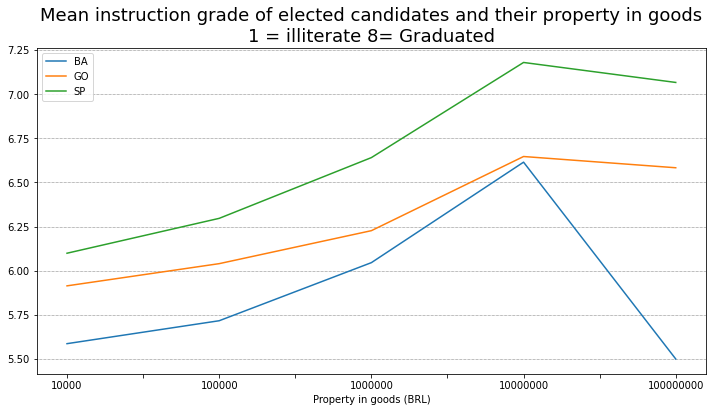

In [38]:
ax = df_graph.plot.line(rot=0, figsize=(12,6))
ax.set_xlabel('Property in goods (BRL)')
ax.set_title('''Mean instruction grade of elected candidates and their property in goods
1 = illiterate 8= Graduated''', fontsize=18)
ax.grid(linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid()

In [39]:
BA_4x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_nonelecteds_BA.query("VR_BEM_CANDIDATO <= 10000").index)]
BA_5x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_nonelecteds_BA.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").index)]
BA_6x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_nonelecteds_BA.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").index)]
BA_7x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_nonelecteds_BA.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").index)]
BA_8x0 = df_instruction_BA[df_instruction_BA.SQ_CANDIDATO.isin(df_goods_nonelecteds_BA.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").index)]

GO_4x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_nonelecteds_GO.query("VR_BEM_CANDIDATO <= 10000").index)]
GO_5x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_nonelecteds_GO.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").index)]
GO_6x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_nonelecteds_GO.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").index)]
GO_7x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_nonelecteds_GO.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").index)]
GO_8x0 = df_instruction_GO[df_instruction_GO.SQ_CANDIDATO.isin(df_goods_nonelecteds_GO.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").index)]

SP_4x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_nonelecteds_SP.query("VR_BEM_CANDIDATO <= 10000").index)]
SP_5x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_nonelecteds_SP.query("10000 <= VR_BEM_CANDIDATO <= 100000.0").index)]
SP_6x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_nonelecteds_SP.query("100000 <= VR_BEM_CANDIDATO <= 1000000.0").index)]
SP_7x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_nonelecteds_SP.query("1000000 <= VR_BEM_CANDIDATO <= 10000000.0").index)]
SP_8x0 = df_instruction_SP[df_instruction_SP.SQ_CANDIDATO.isin(df_goods_nonelecteds_SP.query("10000000 <= VR_BEM_CANDIDATO <= 100000000.0").index)]

graph_BA = [BA_4x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_5x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_6x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_7x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            BA_8x0["CD_GRAU_INSTRUCAO"].values.mean()]

graph_GO = [GO_4x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_5x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_6x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_7x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            GO_8x0["CD_GRAU_INSTRUCAO"].values.mean()]

graph_SP = [SP_4x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_5x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_6x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_7x0["CD_GRAU_INSTRUCAO"].values.mean(), 
            SP_8x0["CD_GRAU_INSTRUCAO"].values.mean()]

df_graph = pd.DataFrame({'BA': graph_BA, 'GO': graph_GO, 'SP': graph_SP}, 
                      index=['10000','100000','1000000', '10000000', '100000000'])
df_graph

,BA,GO,SP
10000,5.476861,5.479487,5.787644
100000,5.615905,5.715657,5.975606
1000000,6.011763,6.042969,6.265156
10000000,6.737945,6.553055,7.066806
100000000,6.769231,6.054054,7.140000


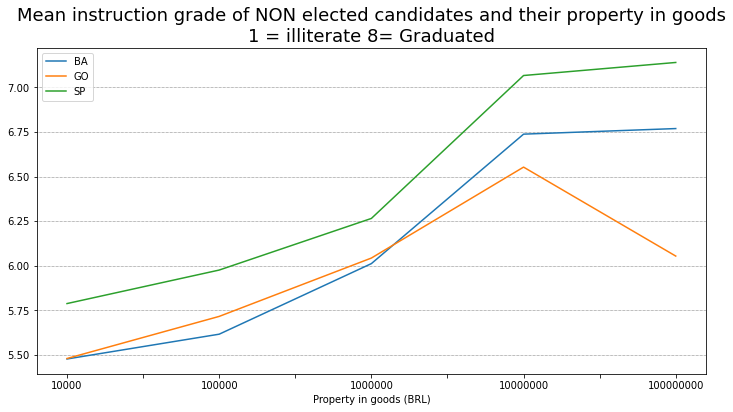

In [40]:
ax = df_graph.plot.line(rot=0, figsize=(12,6))
ax.set_xlabel('Property in goods (BRL)')
ax.set_title('''Mean instruction grade of NON elected candidates and their property in goods
1 = illiterate 8= Graduated''', fontsize=18)
ax.grid(linestyle=':', linewidth='0.5', color='black')
ax.xaxis.grid()